<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/occupancy/spike_time%2Bkde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리

In [3]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 KB 11.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt

In [ ]:
all = pd.read_csv('/content/2019_시간대_전체_20230130_51107.csv', encoding='cp949')
ts = pd.read_excel('/content/Time Series Data_19.xlsx')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16,34,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
f_df = all.iloc[:,:23]
day = f_df[['평토일구분코드']]
df = pd.concat([day, ts],axis=1)

In [ ]:
wd = df[df['평토일구분코드'] == 1]
we = df[(df['평토일구분코드'] == 2) | (df['평토일구분코드'] == 3)]
wd = wd.drop(['평토일구분코드'], axis=1)
we = we.drop(['평토일구분코드'], axis=1)

In [ ]:
km = TimeSeriesKMeans(n_clusters = 3, max_iter=50, metric="euclidean", random_state=42, n_jobs=-1)
km.fit(wd)
wd['cluster'] = km.labels_

## wd 클러스터 0

In [ ]:
wd0 = wd[wd['cluster'] == 0]
wd0 = wd0.drop(['cluster'], axis=1)

In [ ]:
###1
wd0_1 = wd0.copy()
for i in range(0, wd0_1.shape[0]) : 
    for k in range(0, wd0_1.shape[1]) :  
        a = str(wd0_1.iloc[int(i), int(k)])  
        if a == '1' : wd0_1.iloc[int(i), int(k)] = 1
        else :  wd0_1.iloc[int(i), int(k)] = 0

aa = wd0_1.reset_index()
aa = aa.drop(['index'],axis=1)
wd01_list = aa.values.tolist()

KeyboardInterrupt: ignored

In [ ]:
###2
wd0_2 = wd0.copy()
for i in range(0, wd0_2.shape[0]) : 
    for k in range(0, wd0_2.shape[1]) :  
        a = str(wd0_2.iloc[int(i), int(k)])  
        if a == '2' : wd0_2.iloc[int(i), int(k)] = 1
        else :  wd0_2.iloc[int(i), int(k)] = 0

b = wd0_2.reset_index()
b = b.drop(['index'],axis=1)
wd02_list = b.values.tolist()

In [ ]:
###3
wd0_3 = wd0.copy()
for i in range(0, wd0_3.shape[0]) : 
    for k in range(0, wd0_3.shape[1]) :  
        a = str(wd0_3.iloc[int(i), int(k)])  
        if a == '3' : wd0_3.iloc[int(i), int(k)] = 1
        else :  wd0_3.iloc[int(i), int(k)] = 0

c = wd0_3.reset_index()
c = c.drop(['index'],axis=1)
wd03_list = c.values.tolist()

In [ ]:
###4
wd0_4 = wd0.copy()
for i in range(0, wd0_4.shape[0]) : 
    for k in range(0, wd0_4.shape[1]) :  
        a = str(wd0_4.iloc[int(i), int(k)])  
        if a == '4' : wd0_4.iloc[int(i), int(k)] = 1
        else :  wd0_4.iloc[int(i), int(k)] = 0

d = wd0_4.reset_index()
d = d.drop(['index'],axis=1)
wd04_list = d.values.tolist()

In [ ]:
###5
wd0_5 = wd0.copy()
for i in range(0, wd0_5.shape[0]) : 
    for k in range(0, wd0_5.shape[1]) :  
        a = str(wd0_5.iloc[int(i), int(k)])  
        if a == '5' : wd0_5.iloc[int(i), int(k)] = 1
        else :  wd0_5.iloc[int(i), int(k)] = 0

e = wd0_5.reset_index()
e = e.drop(['index'],axis=1)
wd05_list = e.values.tolist()

In [ ]:
###6
wd0_6 = wd0.copy()
for i in range(0, wd0_6.shape[0]) : 
    for k in range(0, wd0_6.shape[1]) :  
        a = str(wd0_6.iloc[int(i), int(k)])  
        if a == '6' : wd0_6.iloc[int(i), int(k)] = 1
        else :  wd0_6.iloc[int(i), int(k)] = 0

f = wd0_6.reset_index()
f = f.drop(['index'],axis=1)
wd06_list = f.values.tolist()

In [ ]:
wd0 = pd.concat([aa, b, c, d, e, f],axis=1)
wd0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Columns: 864 entries, 00:00:00 to 23:50:00
dtypes: int64(864)
memory usage: 64.8 MB


In [ ]:
wd0_list = wd0.values.tolist()

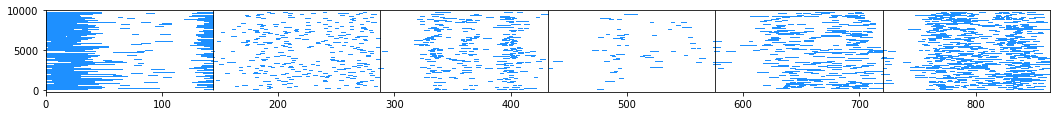

In [ ]:
spike_value = 1

fig, ax = plt.subplots(figsize=(18,1.5))  #괄호안에 figsize=(10,5)

# Loop to plot raster for each trial
for trial in range(len(wd0_list)):
    spike_times = [i for i, x in enumerate(wd0_list[trial]) if x == spike_value]
    ax.vlines(spike_times, trial - 0.5, trial+0.5, color='dodgerblue', linewidth=4)

plt.vlines(144, 0, 10000, color='black', linestyle='solid', linewidth=0.8)
plt.vlines(144*2, -200, 10000, color='black', linestyle='solid', linewidth=0.8)
plt.vlines(144*3, -200, 10000, color='black', linestyle='solid', linewidth=0.8)
plt.vlines(144*4, -200, 10000, color='black', linestyle='solid', linewidth=0.8)
plt.vlines(144*5, -200, 10000, color='black', linestyle='solid', linewidth=0.8)

ax.set_xlim([0, 864])
ax.set_ylim([-200, 10000])

ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.show()

In [ ]:
wd0.to_csv('/content/wd0.csv')

## wd 클러스터 1

In [ ]:
wd1 = wd[wd['cluster'] == 1]
wd1 = wd1.drop(['cluster'], axis=1)

In [ ]:
###1
wd1_1 = wd1.copy()
for i in range(0, wd1_1.shape[0]) : 
    for k in range(0, wd1_1.shape[1]) :  
        a = str(wd1_1.iloc[int(i), int(k)])  
        if a == '1' : wd1_1.iloc[int(i), int(k)] = 1
        else :  wd1_1.iloc[int(i), int(k)] = 0

aa1 = wd1_1.reset_index()
aa1 = aa1.drop(['index'],axis=1)
wd11_list = aa1.values.tolist()

In [ ]:
###2
wd1_2 = wd1.copy()
for i in range(0, wd1_2.shape[0]) : 
    for k in range(0, wd1_2.shape[1]) :  
        a = str(wd1_2.iloc[int(i), int(k)])  
        if a == '2' : wd1_2.iloc[int(i), int(k)] = 1
        else :  wd1_2.iloc[int(i), int(k)] = 0

b1 = wd1_2.reset_index()
b1 = b1.drop(['index'],axis=1)
wd12_list = b1.values.tolist()

In [ ]:
###3
wd1_3 = wd1.copy()
for i in range(0, wd1_3.shape[0]) : 
    for k in range(0, wd1_3.shape[1]) :  
        a = str(wd1_3.iloc[int(i), int(k)])  
        if a == '3' : wd1_3.iloc[int(i), int(k)] = 1
        else :  wd1_3.iloc[int(i), int(k)] = 0

c1 = wd1_3.reset_index()
c1 = c1.drop(['index'],axis=1)
wd13_list = c1.values.tolist()

In [ ]:
###4
wd1_4 = wd1.copy()
for i in range(0, wd1_4.shape[0]) : 
    for k in range(0, wd1_4.shape[1]) :  
        a = str(wd1_4.iloc[int(i), int(k)])  
        if a == '4' : wd1_4.iloc[int(i), int(k)] = 1
        else :  wd1_4.iloc[int(i), int(k)] = 0

d1 = wd1_4.reset_index()
d1 = d1.drop(['index'],axis=1)
wd14_list = d1.values.tolist()

In [ ]:
###5
wd1_5 = wd1.copy()
for i in range(0, wd1_5.shape[0]) : 
    for k in range(0, wd1_5.shape[1]) :  
        a = str(wd1_5.iloc[int(i), int(k)])  
        if a == '5' : wd1_5.iloc[int(i), int(k)] = 1
        else :  wd1_5.iloc[int(i), int(k)] = 0

e1 = wd1_5.reset_index()
e1 = e1.drop(['index'],axis=1)
wd15_list = e1.values.tolist()

In [ ]:
###6
wd1_6 = wd1.copy()
for i in range(0, wd1_6.shape[0]) : 
    for k in range(0, wd1_6.shape[1]) :  
        a = str(wd1_6.iloc[int(i), int(k)])  
        if a == '6' : wd1_6.iloc[int(i), int(k)] = 1
        else :  wd1_6.iloc[int(i), int(k)] = 0

f1 = wd1_6.reset_index()
f1 = f1.drop(['index'],axis=1)
wd16_list = f1.values.tolist()

In [ ]:
wd1 = pd.concat([aa1, b1, c1, d1, e1, f1],axis=1)
wd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12223 entries, 0 to 12222
Columns: 864 entries, 00:00:00 to 23:50:00
dtypes: int64(864)
memory usage: 80.6 MB


In [ ]:
wd1.to_csv('/content/wd1.csv')

In [ ]:
wd1_list = wd1.values.tolist()

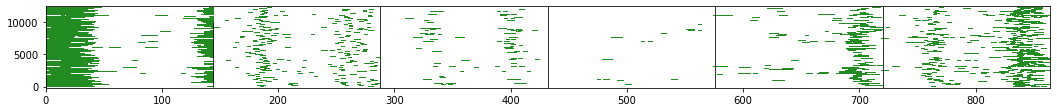

In [ ]:
spike_value = 1

fig, ax = plt.subplots(figsize=(18,1.5))  #괄호안에 figsize=(10,5)

# Loop to plot raster for each trial
for trial in range(len(wd1_list)):
    spike_times = [i for i, x in enumerate(wd1_list[trial]) if x == spike_value]
    ax.vlines(spike_times, trial - 0.5, trial+0.5, color='forestgreen', linewidth=4)

plt.vlines(144, 0, 10000, color='black', linestyle='solid', linewidth=0.8)
plt.vlines(144*2, -200, 12400, color='black', linestyle='solid', linewidth=0.8)
plt.vlines(144*3, -200, 12400, color='black', linestyle='solid', linewidth=0.8)
plt.vlines(144*4, -200, 12400, color='black', linestyle='solid', linewidth=0.8)
plt.vlines(144*5, -200, 12400, color='black', linestyle='solid', linewidth=0.8)

ax.set_xlim([0, 864])
ax.set_ylim([-200, 12400])

ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.show()

## wd 클러스터 2

In [ ]:
wd2 = wd[wd['cluster'] == 2]
wd2 = wd2.drop(['cluster'], axis=1)

In [ ]:
###1
wd2_1 = wd2.copy()
for i in range(0, wd2_1.shape[0]) : 
    for k in range(0, wd2_1.shape[1]) :  
        a = str(wd2_1.iloc[int(i), int(k)])  
        if a == '1' : wd2_1.iloc[int(i), int(k)] = 1
        else :  wd2_1.iloc[int(i), int(k)] = 0

aa2 = wd2_1.reset_index()
aa2 = aa2.drop(['index'],axis=1)
wd21_list = aa2.values.tolist()

In [ ]:
###2
wd2_2 = wd2.copy()
for i in range(0, wd2_2.shape[0]) : 
    for k in range(0, wd2_2.shape[1]) :  
        a = str(wd2_2.iloc[int(i), int(k)])  
        if a == '2' : wd2_2.iloc[int(i), int(k)] = 1
        else :  wd2_2.iloc[int(i), int(k)] = 0

b2 = wd2_2.reset_index()
b2 = b2.drop(['index'],axis=1)
wd22_list = b2.values.tolist()

In [ ]:
###3
wd2_3 = wd2.copy()
for i in range(0, wd2_3.shape[0]) : 
    for k in range(0, wd2_3.shape[1]) :  
        a = str(wd2_3.iloc[int(i), int(k)])  
        if a == '3' : wd2_3.iloc[int(i), int(k)] = 1
        else :  wd2_3.iloc[int(i), int(k)] = 0

c2 = wd2_3.reset_index()
c2 = c2.drop(['index'],axis=1)
wd23_list = c2.values.tolist()

In [ ]:
###4
wd2_4 = wd2.copy()
for i in range(0, wd2_4.shape[0]) : 
    for k in range(0, wd2_4.shape[1]) :  
        a = str(wd2_4.iloc[int(i), int(k)])  
        if a == '4' : wd2_4.iloc[int(i), int(k)] = 1
        else :  wd2_4.iloc[int(i), int(k)] = 0

d2 = wd2_4.reset_index()
d2 = d2.drop(['index'],axis=1)
wd24_list = d2.values.tolist()

In [ ]:
###5
wd2_5 = wd2.copy()
for i in range(0, wd2_5.shape[0]) : 
    for k in range(0, wd2_5.shape[1]) :  
        a = str(wd2_5.iloc[int(i), int(k)])  
        if a == '5' : wd2_5.iloc[int(i), int(k)] = 1
        else :  wd2_5.iloc[int(i), int(k)] = 0

e2 = wd2_5.reset_index()
e2 = e2.drop(['index'],axis=1)
wd25_list = e2.values.tolist()

In [ ]:
###6
wd2_6 = wd2.copy()
for i in range(0, wd2_6.shape[0]) : 
    for k in range(0, wd2_6.shape[1]) :  
        a = str(wd2_6.iloc[int(i), int(k)])  
        if a == '6' : wd2_6.iloc[int(i), int(k)] = 1
        else :  wd2_6.iloc[int(i), int(k)] = 0

f2 = wd2_6.reset_index()
f2 = f2.drop(['index'],axis=1)
wd26_list = f2.values.tolist()

In [ ]:
wd2 = pd.concat([aa2, b2, c2, d2, e2, f2],axis=1)
wd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9255 entries, 0 to 9254
Columns: 864 entries, 00:00:00 to 23:50:00
dtypes: int64(864)
memory usage: 61.0 MB


In [ ]:
wd2.to_csv('/content/wd2.csv')

In [ ]:
wd2_list = wd2.values.tolist()

In [ ]:
wd0 = pd.read_csv('/content/wd0.csv', encoding='cp949')
wd0_list = wd0.values.tolist()

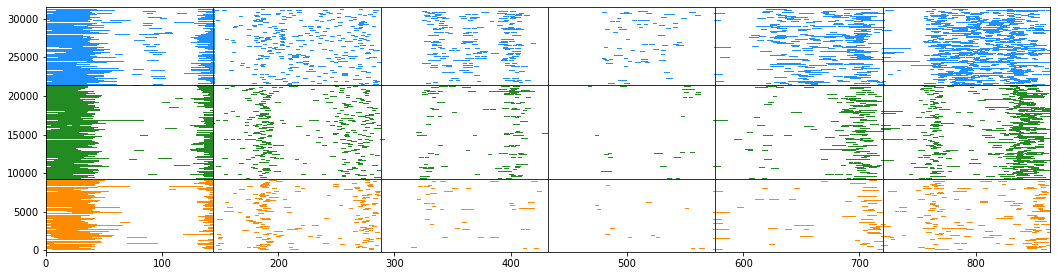

In [ ]:
spike_value = 1

fig, ax = plt.subplots(figsize=(18, 4.5))  #괄호안에 figsize=(10,5)

# Loop to plot raster for each trial
for trial in range(len(wd2_list)):
    spike_times = [i for i, x in enumerate(wd2_list[trial]) if x == spike_value]
    ax.vlines(spike_times, trial - 0.5, trial+0.5, color='darkorange', linewidth=4)

for trial2 in range(len(wd1_list)):
    spike_times2 = [i for i, x in enumerate(wd1_list[trial2]) if x == spike_value]
    ax.vlines(spike_times2, len(wd2_list)+trial2 - 0.5, len(wd2_list)+trial2+0.5, color='forestgreen', linewidth=4)

for trial3 in range(len(wd0_list)):
    spike_times3 = [i for i, x in enumerate(wd0_list[trial3]) if x == spike_value]
    ax.vlines(spike_times3, len(wd2_list)+len(wd1_list)+trial3 - 0.5, len(wd2_list)+len(wd1_list)+trial3+0.5, color='dodgerblue', linewidth=4)

plt.hlines(len(wd2_list), 0, 864, color='black', linestyle='solid', linewidth=0.8)
plt.hlines(len(wd2_list)+len(wd1_list), 0, 864, color='black', linestyle='solid', linewidth=0.8)

plt.vlines(144, -200, 31500, color='black', linestyle='solid', linewidth=0.8)
plt.vlines(144*2, -200, 31500, color='black', linestyle='solid', linewidth=0.8)
plt.vlines(144*3, -200, 31500, color='black', linestyle='solid', linewidth=0.8)
plt.vlines(144*4, -200, 31500, color='black', linestyle='solid', linewidth=0.8)
plt.vlines(144*5, -200, 31500, color='black', linestyle='solid', linewidth=0.8)

ax.set_xlim([0, 864])
ax.set_ylim([-200, 31500])

ax.xaxis.grid(False)
ax.yaxis.grid(False)
plt.show()

## kde

In [5]:
wd0 = pd.read_csv('/content/wd0.csv', encoding='cp949')
wd0 = wd0.drop(['Unnamed: 0'],axis=1)
wd1 = pd.read_csv('/content/wd1.csv', encoding='cp949')
wd1 = wd1.drop(['Unnamed: 0'],axis=1)
wd2 = pd.read_csv('/content/wd2.csv', encoding='cp949')
wd2 = wd2.drop(['Unnamed: 0'],axis=1)

In [6]:
wd01 = wd0.iloc[:, :144]
wd02 = wd0.iloc[:, 144:288]
wd03 = wd0.iloc[:, 288:432]
wd04 = wd0.iloc[:, 432:576]
wd05 = wd0.iloc[:, 576:720]
wd06 = wd0.iloc[:, 720:]

In [7]:
# sum
wd01_sum = (wd01.sum(axis=1))/6
wd02_sum = (wd02.sum(axis=1))/6
wd03_sum = (wd03.sum(axis=1))/6
wd04_sum = (wd04.sum(axis=1))/6
wd05_sum = (wd05.sum(axis=1))/6
wd06_sum = (wd06.sum(axis=1))/6
wd0_sum = pd.concat([wd01_sum, wd02_sum, wd03_sum, wd04_sum, wd05_sum, wd06_sum],axis=1)

In [17]:
wd11 = wd1.iloc[:, :144]
wd12 = wd1.iloc[:, 144:288]
wd13 = wd1.iloc[:, 288:432]
wd14 = wd1.iloc[:, 432:576]
wd15 = wd1.iloc[:, 576:720]
wd16 = wd1.iloc[:, 720:]

wd11_sum = (wd11.sum(axis=1))/6
wd12_sum = (wd12.sum(axis=1))/6
wd13_sum = (wd13.sum(axis=1))/6
wd14_sum = (wd14.sum(axis=1))/6
wd15_sum = (wd15.sum(axis=1))/6
wd16_sum = (wd16.sum(axis=1))/6

In [18]:
wd21 = wd2.iloc[:, :144]
wd22 = wd2.iloc[:, 144:288]
wd23 = wd2.iloc[:, 288:432]
wd24 = wd2.iloc[:, 432:576]
wd25 = wd2.iloc[:, 576:720]
wd26 = wd2.iloc[:, 720:]

wd21_sum = (wd21.sum(axis=1))/6
wd22_sum = (wd22.sum(axis=1))/6
wd23_sum = (wd23.sum(axis=1))/6
wd24_sum = (wd24.sum(axis=1))/6
wd25_sum = (wd25.sum(axis=1))/6
wd26_sum = (wd26.sum(axis=1))/6

In [8]:
import seaborn as sns

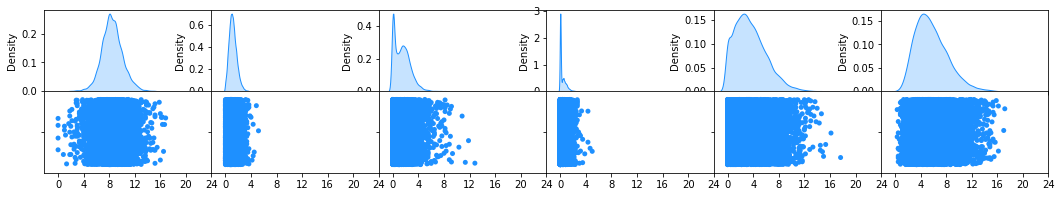

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=6, sharex=True, figsize=(18,3))
                         
sns.kdeplot(wd01_sum, shade=True, color='dodgerblue', ax=axes[0,0])
sns.stripplot(x=wd01_sum, jitter=0.4, color='dodgerblue', ax=axes[1,0])

sns.kdeplot(wd02_sum, shade=True, color='dodgerblue', ax=axes[0,1])
sns.stripplot(x=wd02_sum, jitter=0.4, color='dodgerblue', ax=axes[1,1])

sns.kdeplot(wd03_sum, shade=True, color='dodgerblue', ax=axes[0,2])
sns.stripplot(x=wd03_sum, jitter=0.4, color='dodgerblue', ax=axes[1,2])

sns.kdeplot(wd04_sum, shade=True, color='dodgerblue', ax=axes[0,3])
sns.stripplot(x=wd04_sum, jitter=0.4, color='dodgerblue', ax=axes[1,3])

sns.kdeplot(wd05_sum, shade=True, color='dodgerblue', ax=axes[0,4])
sns.stripplot(x=wd05_sum, jitter=0.4, color='dodgerblue', ax=axes[1,4])

sns.kdeplot(wd06_sum, shade=True, color='dodgerblue', ax=axes[0,5])
sns.stripplot(x=wd06_sum, jitter=0.4, color='dodgerblue', ax=axes[1,5])

plt.setp(axes, xticks=[0, 4, 8, 12, 16, 20, 24], xticklabels=[0, 4, 8, 12, 16, 20, 24])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

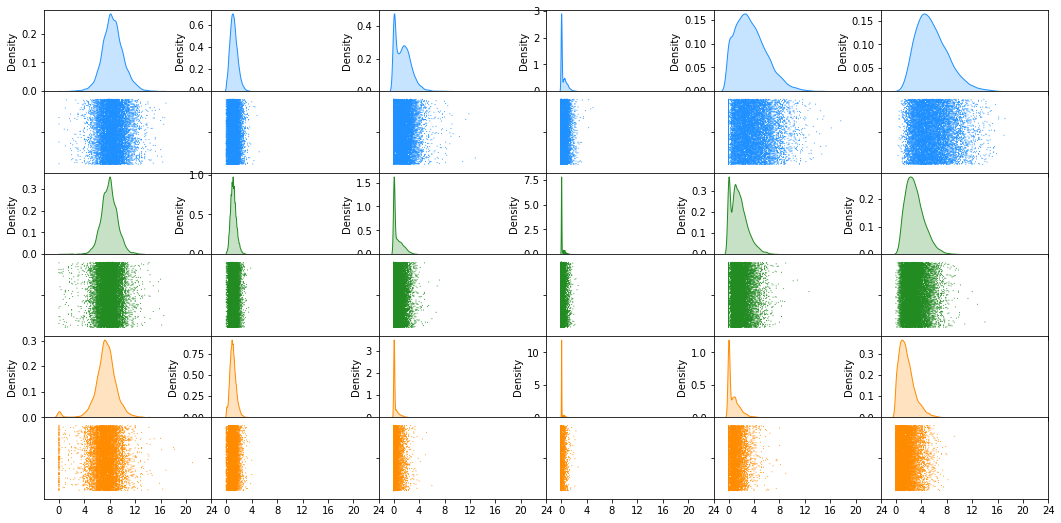

In [22]:
fig, axes = plt.subplots(nrows=6, ncols=6, sharex=True, figsize=(18,9))
                         
sns.kdeplot(wd01_sum, shade=True, color='dodgerblue', ax=axes[0,0])
sns.stripplot(x=wd01_sum, jitter=0.4, size=1, color='dodgerblue', ax=axes[1,0])

sns.kdeplot(wd02_sum, shade=True, color='dodgerblue', ax=axes[0,1])
sns.stripplot(x=wd02_sum, jitter=0.4, size=1, color='dodgerblue', ax=axes[1,1])

sns.kdeplot(wd03_sum, shade=True, color='dodgerblue', ax=axes[0,2])
sns.stripplot(x=wd03_sum, jitter=0.4, size=1, color='dodgerblue', ax=axes[1,2])

sns.kdeplot(wd04_sum, shade=True, color='dodgerblue', ax=axes[0,3])
sns.stripplot(x=wd04_sum, jitter=0.4, size=1, color='dodgerblue', ax=axes[1,3])

sns.kdeplot(wd05_sum, shade=True, color='dodgerblue', ax=axes[0,4])
sns.stripplot(x=wd05_sum, jitter=0.4, size=1, color='dodgerblue', ax=axes[1,4])

sns.kdeplot(wd06_sum, shade=True, color='dodgerblue', ax=axes[0,5])
sns.stripplot(x=wd06_sum, jitter=0.4, size=1, color='dodgerblue', ax=axes[1,5])

####
sns.kdeplot(wd11_sum, shade=True, color='forestgreen', ax=axes[2,0])
sns.stripplot(x=wd11_sum, jitter=0.4, size=1, color='forestgreen', ax=axes[3,0])

sns.kdeplot(wd12_sum, shade=True, color='forestgreen', ax=axes[2,1])
sns.stripplot(x=wd12_sum, jitter=0.4, size=1, color='forestgreen', ax=axes[3,1])

sns.kdeplot(wd13_sum, shade=True, color='forestgreen', ax=axes[2,2])
sns.stripplot(x=wd13_sum, jitter=0.4, size=1, color='forestgreen', ax=axes[3,2])

sns.kdeplot(wd14_sum, shade=True, color='forestgreen', ax=axes[2,3])
sns.stripplot(x=wd14_sum, jitter=0.4, size=1, color='forestgreen', ax=axes[3,3])

sns.kdeplot(wd15_sum, shade=True, color='forestgreen', ax=axes[2,4])
sns.stripplot(x=wd15_sum, jitter=0.4, size=1, color='forestgreen', ax=axes[3,4])

sns.kdeplot(wd16_sum, shade=True, color='forestgreen', ax=axes[2,5])
sns.stripplot(x=wd16_sum, jitter=0.4, size=1, color='forestgreen', ax=axes[3,5])

###
sns.kdeplot(wd21_sum, shade=True, color='darkorange', ax=axes[4,0])
sns.stripplot(x=wd21_sum, jitter=0.4, size=1, color='darkorange', ax=axes[5,0])

sns.kdeplot(wd22_sum, shade=True, color='darkorange', ax=axes[4,1])
sns.stripplot(x=wd22_sum, jitter=0.4, size=1, color='darkorange', ax=axes[5,1])

sns.kdeplot(wd23_sum, shade=True, color='darkorange', ax=axes[4,2])
sns.stripplot(x=wd23_sum, jitter=0.4, size=1, color='darkorange', ax=axes[5,2])

sns.kdeplot(wd24_sum, shade=True, color='darkorange', ax=axes[4,3])
sns.stripplot(x=wd24_sum, jitter=0.4, size=1, color='darkorange', ax=axes[5,3])

sns.kdeplot(wd25_sum, shade=True, color='darkorange', ax=axes[4,4])
sns.stripplot(x=wd25_sum, jitter=0.4, size=1, color='darkorange', ax=axes[5,4])

sns.kdeplot(wd26_sum, shade=True, color='darkorange', ax=axes[4,5])
sns.stripplot(x=wd26_sum, jitter=0.4, size=1, color='darkorange', ax=axes[5,5])

plt.setp(axes, xticks=[0, 4, 8, 12, 16, 20, 24], xticklabels=[0, 4, 8, 12, 16, 20, 24])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()